In [57]:
# import the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [58]:
# import the dataset
df= pd.read_excel("C:/Users/pc/Downloads/cohort/1/transaction.xlsx")
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000


In [59]:
# check the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      19640 non-null  float64       
 5   order_status      20000 non-null  object        
 6   brand             19803 non-null  object        
 7   product_line      19803 non-null  object        
 8   product_class     19803 non-null  object        
 9   product_size      19803 non-null  object        
 10  list_price        20000 non-null  float64       
 11  standard_cost     19803 non-null  float64       
 12  transaction_id.1  20000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


The dataset consist of 13 columns and 20,000 records, transaction_id, product_id and customer_id columns are of integer data dtype. online_order, list_price, standard_cost, transaction_id columns are of float data type. Amd order_status, brand,product_line, product_class and product_size are object and the transaction_date is a datetime 

In [60]:
# compute the the values and the percentage of the missing values
missing_value = df.isna().sum()
missing_value = missing_value.reset_index().rename(columns={
    
            "index": "Column",
            0:'missing_value'
})


percentage = pd.DataFrame(df.isna().sum() * 100 / df.shape[0],).round(2)
percentage = percentage.reset_index().rename(columns={
    
            "index": "Column",
            0:'Missing_Percentage (%)'
})



Final = missing_value.merge(percentage, how = 'inner', left_on = 'Column', right_on = 'Column')
Final["Missing_Percentage (%..)"] = Final["Missing_Percentage (%)"].astype(str)
Final=Final[Final["missing_value"]>0]
Final

,Column,missing_value,Missing_Percentage (%),Missing_Percentage (%..)
4,online_order,360,1.80,1.8
6,brand,197,0.98,0.98
7,product_line,197,0.98,0.98
8,product_class,197,0.98,0.98
9,product_size,197,0.98,0.98
11,standard_cost,197,0.98,0.98


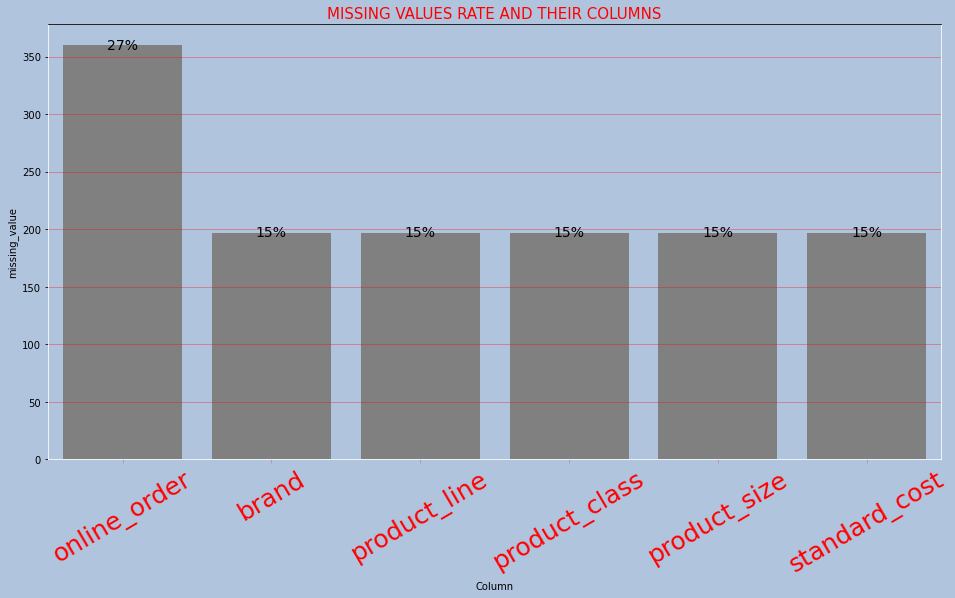

In [61]:
fig, ax = plt.subplots(figsize=(16, 8), facecolor=('#B0C4DE'))
ax.set_facecolor('#B0C4DE')
ax.grid(True, alpha=.4, color="red")
plot = sns.barplot(x=Final.Column, y = Final.missing_value, palette=["grey"])
ax.tick_params(axis="x", color="#BC8F8F", labelrotation=30.5, labelsize= 25, labelcolor="red")
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.set_title("MISSING VALUES RATE AND THEIR COLUMNS", color="red", fontsize= 15)
for p in plot.patches:
    plot.annotate(format(round(p.get_height()/Final.missing_value.values.sum()*100, 2), '.0f')+"%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=14,
                   xytext=(0, 0),
                   textcoords='offset points'
                 )
plt.show()

online_order, brand, product_line, product_class, product_class, product_size,standard_cost columns all contain missing values. each of them will be taken care of later in the notebook

# Treating the missing values

In [62]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000


# online_order column

In [63]:
# filter out when the online_order column is nan, to see reasoning for the nan values
df[df.online_order.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,395.000000
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,4154.666667
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,427.333333
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,2476.333333
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,3198.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,-12073.000000
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,-10730.000000
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,-10460.333333
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,-11206.000000


Clearly, it can be seen that the missing values might be because of omission(typing error). So to treating the missing values, I will forward fill the resulting nan values

In [64]:
# forward fill the missing values in the online_order column
df.online_order.ffill(inplace=True)

In [65]:
df.online_order.isna().sum()

0

# brand column

In [66]:
df[df.brand.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,483.333333
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,4293.333333
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,1907.333333
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,3140.666667
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,3027.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,-12303.333333
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,-9713.333333
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,-9382.666667
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,-9949.333333


I filter out when the values is nan in brand column and notice that there are several columns having nan as well, am really sure if this could to as a result of typing errors. But for simplicity, i will fill the missing values with mode 

In [67]:
# fill the missing values with mode
df.brand.fillna(df.brand.mode()[0], inplace=True)

# product_line column

In [68]:
# fill the missing values with mode
df.product_line.fillna(  df.product_line.mode()[0], inplace=True)

# product_class column

In [69]:
# fill the missing values with mode
df.product_class.fillna( df.product_class.mode()[0], inplace=True)

# product_size colums

In [70]:
# fill the missing values with mode

si = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df.product_size = si.fit_transform(df[['product_size']])

# product_line column

In [71]:
si = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df.product_line = si.fit_transform(df[['product_line']])

# product_class column

In [72]:
df.product_class.fillna( df.product_class.mode()[0] , inplace=True)

# standard_cost column

In [73]:
si = SimpleImputer(missing_values=np.nan, strategy="mean")
df.standard_cost = si.fit_transform(df[['standard_cost']])

In [74]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,transaction_id.1
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,3933.333333
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,4159.666667
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,546.333333
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,4206.666667
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1072.000000


Now the dataset is clean enough, then we can move on the data exploration